In [64]:
import yfinance as yF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import os

In [65]:
def get_210(ticker_symbol):
    ticker_symbol['210-SMA'] = ticker_symbol['Close'].rolling(210).mean()
    ticker_symbol['210-STD'] = ticker_symbol['Close'].rolling(21).std()
    ticker_symbol['Signal'] = np.where(ticker_symbol['210-SMA'] > ticker_symbol['Close'], 1, 0)
    ticker_symbol['Close_1'] = ticker_symbol['Close']

In [66]:
def get_STD(t_s):
    mean_std = t_s['210-STD'].mean()
    
    a = t_s['210-STD'].iloc[-1:].round(2)
    print("Current Standard Deviation:", a.to_string())
    print("Average Standard Deviation:", round(mean_std, 2))

In [67]:
def get_SMAdistance(stock_symbol):
    diff = (stock_symbol['Close'].iloc[-1:]-stock_symbol['210-SMA'].iloc[-1:])
    add = ((stock_symbol['Close'].iloc[-1:]+stock_symbol['210-SMA'].iloc[-1:])/2)
    difference = (diff/add)*100
    stock_symbol.loc[(stock_symbol['Close'] < stock_symbol['210-SMA']), 'Close'] = 'NaN'
    
    if difference.iloc[-1] > 0:
        print("Above 210-SMA")
    else:
        print("Below 210-SMA")
    
    a = stock_symbol['210-SMA'].iloc[-1:].round(2)
    b = stock_symbol['Close_1'].iloc[-1:].round(2)
    c = difference.round(2)
    
    print("Current Distance from 210-SMA:", c.to_string())
    print("Current Closing Price:", b.to_string())
    print("Current 210-SMA:", a.to_string())

In [68]:
def clean_df(ticker):
    ticker.drop(['Adj Close','Volume', 'High', 'Low', 'Open'], axis=1, inplace=True)
    ticker.columns = ticker.columns.map(''.join).str.strip('')

In [69]:
def get_std_chart(std_ticker):
    label = ticker_s
    plt.figure(figsize = (30,10))
    plt.title(label, fontsize=15)
    plt.plot(std_ticker['210-STD'])
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()

In [70]:
def comp_chart(port_tick):
    label = ticker_s
    plt.figure(figsize = (30,15))    
    plt.title(label, fontsize=15)
    plt.plot(port_tick['210-SMA'])
    plt.plot(port_tick['Close'])
    plt.show()

In [71]:
def full_chart(port_tick):
    label = ticker_s
    plt.figure(figsize = (30,15))
    plt.title(label, fontsize=15)
    plt.plot(port_tick['210-SMA'])
    plt.plot(port_tick['Close_1'])
    #plt.savefig("FullChart"+str(label)+".jpg")
    plt.show()

In [72]:
def get_performance(current):
    
    #Works, but not on printing new variable
    week_1 = current.tail(5)
    week_2 = current.tail(10)
    week_3 = current.tail(15)
    month_1 = current.tail(21)
    month_3 = current.tail(63)
    month_6 = current.tail(126)
    month_9 = current.tail(189)
    month_12 = current.tail(252)
    
    a= week_1, week_2, week_3, month_1, month_3, month_6, month_9, month_12
    
    data= []
    for df in a:
        diff = (df['Close_1'].iloc[-1]-df['Close_1'].iloc[0])
        add = ((df['Close_1'].iloc[-1]+df['Close_1'].iloc[0])/2)
        df = (diff/add)*100
        data.append([df])
    
    
    data = np.array(data)
    data = pd.DataFrame(data)
    data = data.transpose()
    data = data.rename(columns={0:'1-Week', 1:'2-Week', 2:'3-Week', 3:'1-Month_1', 4:'3 Months', 5:'6 Months', 6:'9 Months', 7:'12 Months'})
    
    #Plot Performance
    label = ticker_s
    plt.figure(figsize=(12,6))
    plt.title(label, fontsize=12)
    splot = sns.barplot(data=data)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f',), 
                       (p.get_x() + p.get_width(), p.get_height()), 
                       ha = 'right', va = 'center', 
                       xytext = (2, 10), fontsize=15,
                       textcoords = 'offset points')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.ylabel('Percent Change', fontsize=10)


In [73]:
def get_stats_chart(dataframe):
    clean_df(dataframe)
    get_210(dataframe)
    get_SMAdistance(dataframe)
    get_STD(dataframe)
    get_performance(dataframe)
    get_std_chart(dataframe)
    full_chart(dataframe)
    #comp_chart(dataframe)

In [74]:
start ="2010-01-01"
end = "2022-06-30"

[*********************100%***********************]  1 of 1 completed
Below 210-SMA
Current Distance from 210-SMA: Date
2022-06-29   -14.2
Current Closing Price: Date
2022-06-29    91.28
Current 210-SMA: Date
2022-06-29    105.24
Current Standard Deviation: Date
2022-06-29    4.39
Average Standard Deviation: 1.46


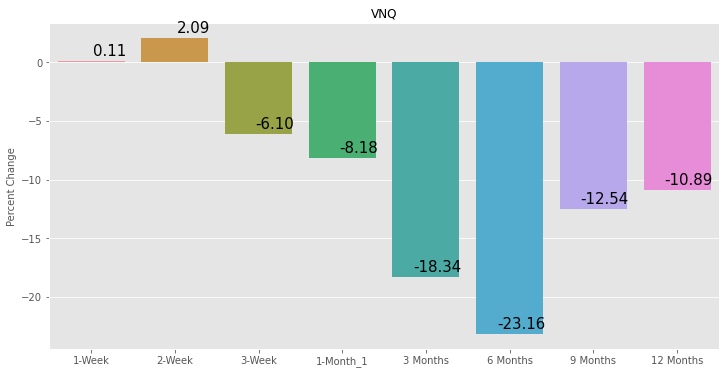

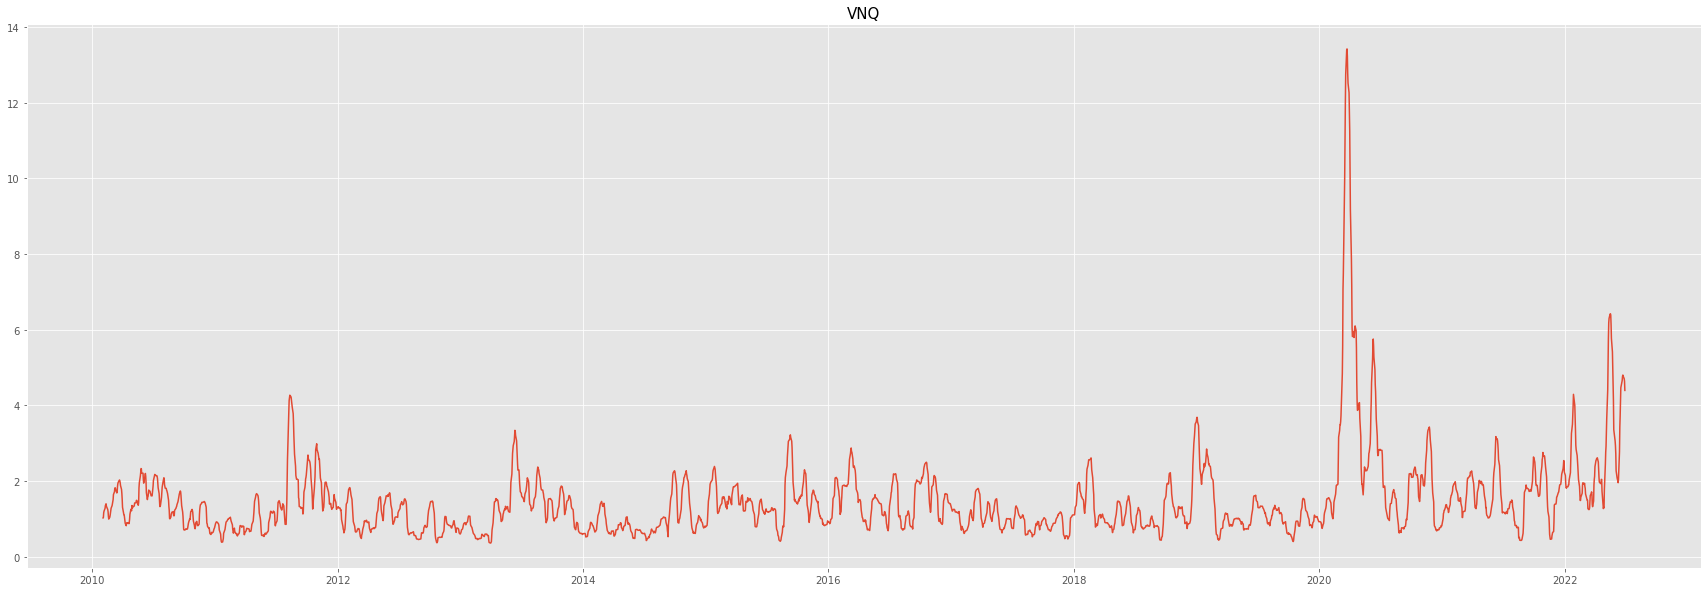

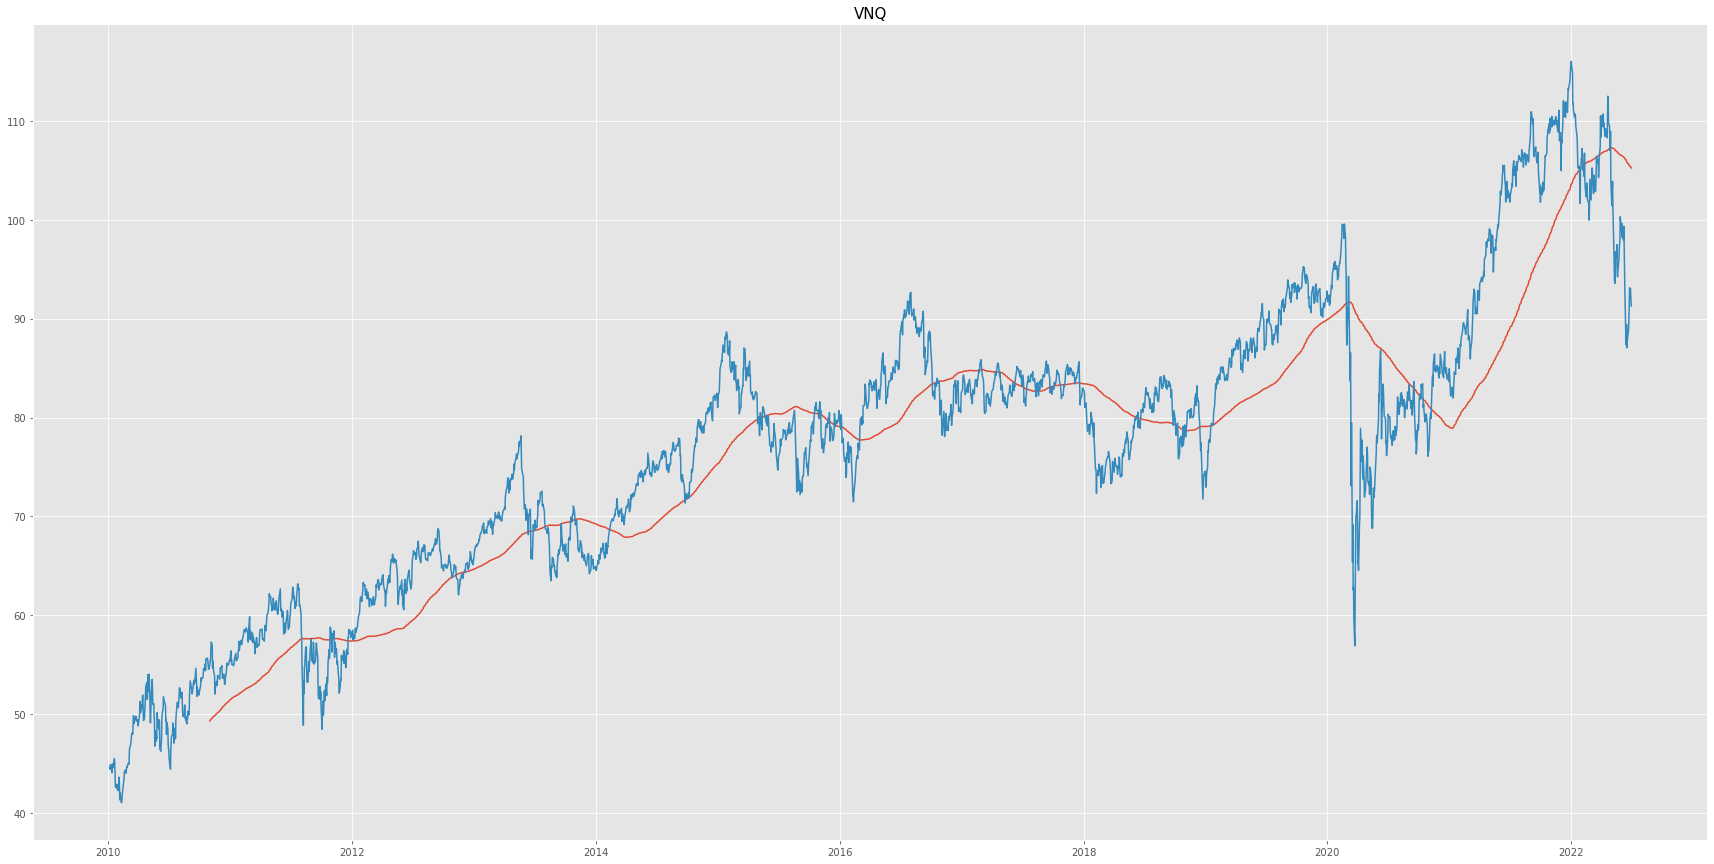

In [75]:
ticker_s = 'VNQ'
df = yF.download(ticker_s, start=start, end=end)
get_stats_chart(df)

[*********************100%***********************]  1 of 1 completed
Below 210-SMA
Current Distance from 210-SMA: Date
2022-06-29   -14.81
Current Closing Price: Date
2022-06-29    24.34
Current 210-SMA: Date
2022-06-29    28.23
Current Standard Deviation: Date
2022-06-29    1.14
Average Standard Deviation: 0.43


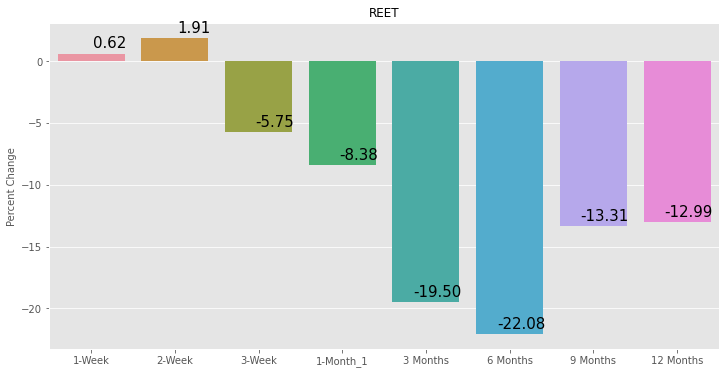

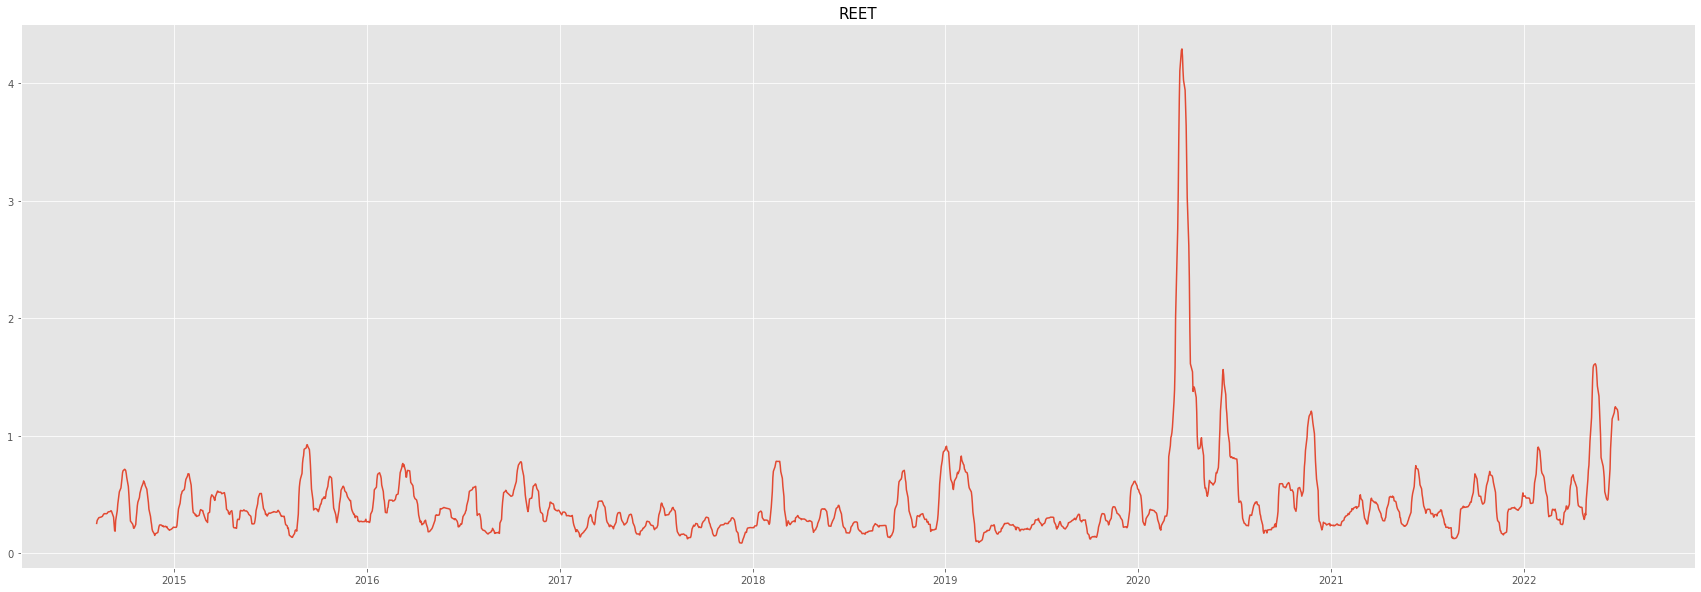

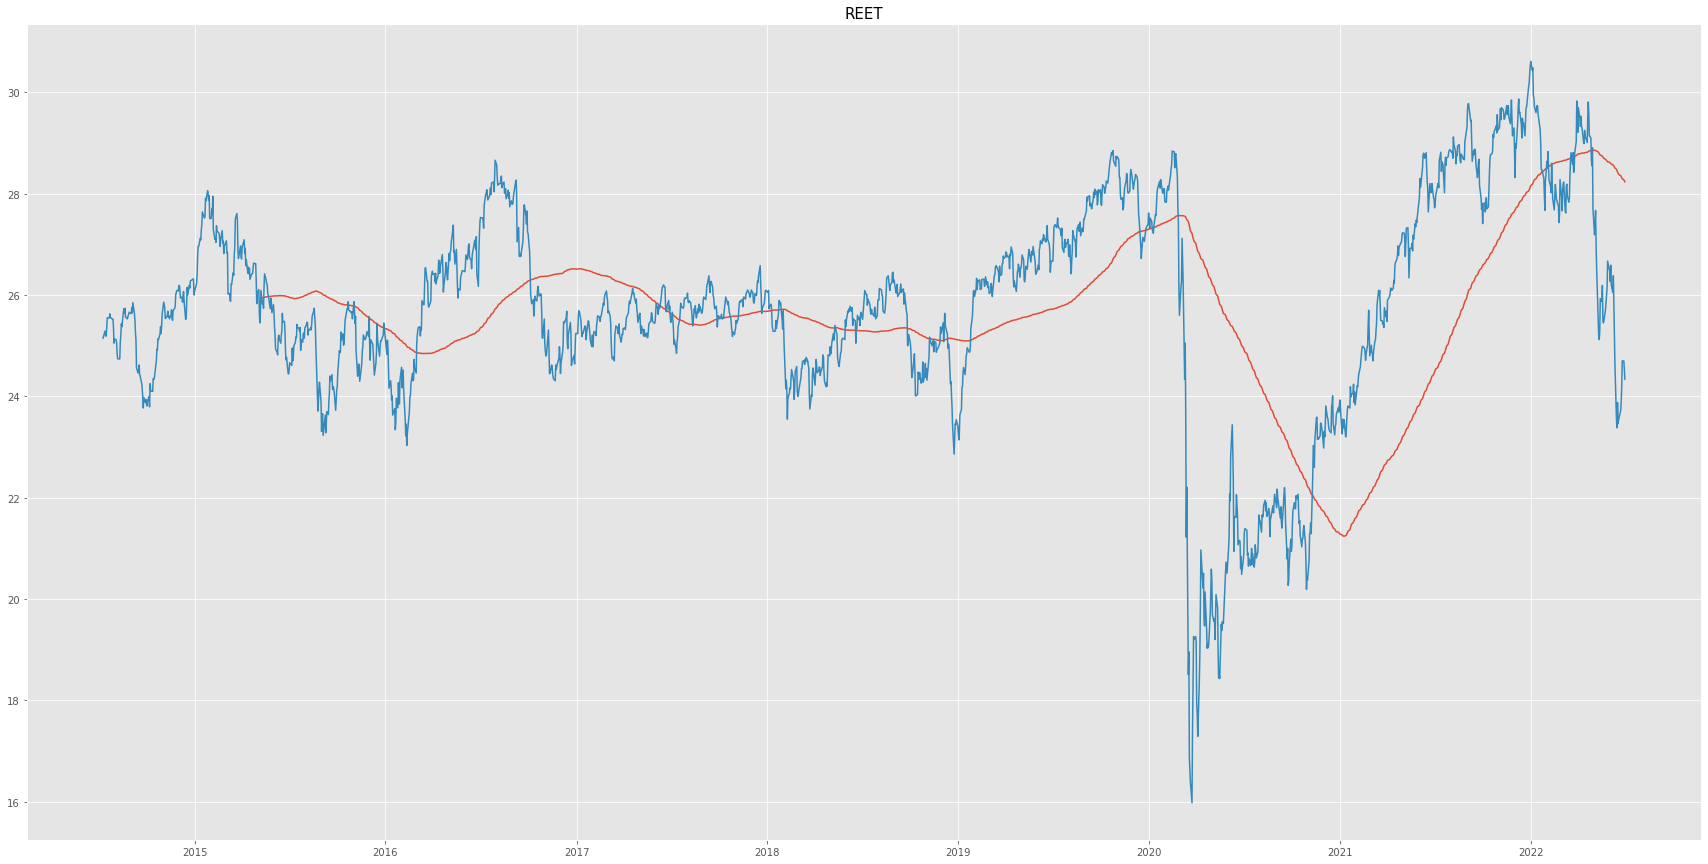

In [76]:
ticker_s = 'REET'
df = yF.download(ticker_s, start=start, end=end)
get_stats_chart(df)

[*********************100%***********************]  1 of 1 completed
Below 210-SMA
Current Distance from 210-SMA: Date
2022-06-29   -8.25
Current Closing Price: Date
2022-06-29    51.74
Current 210-SMA: Date
2022-06-29    56.19
Current Standard Deviation: Date
2022-06-29    2.19
Average Standard Deviation: 0.62


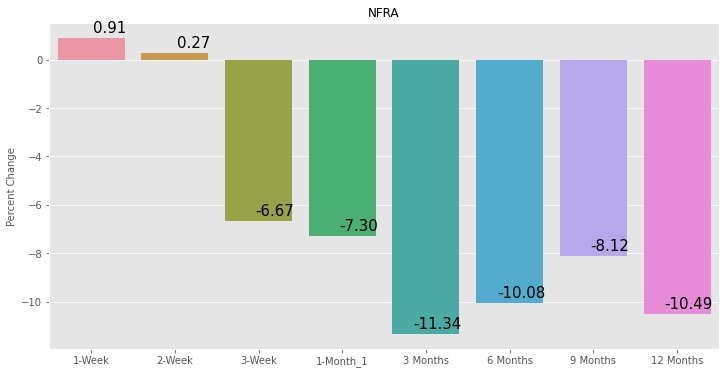

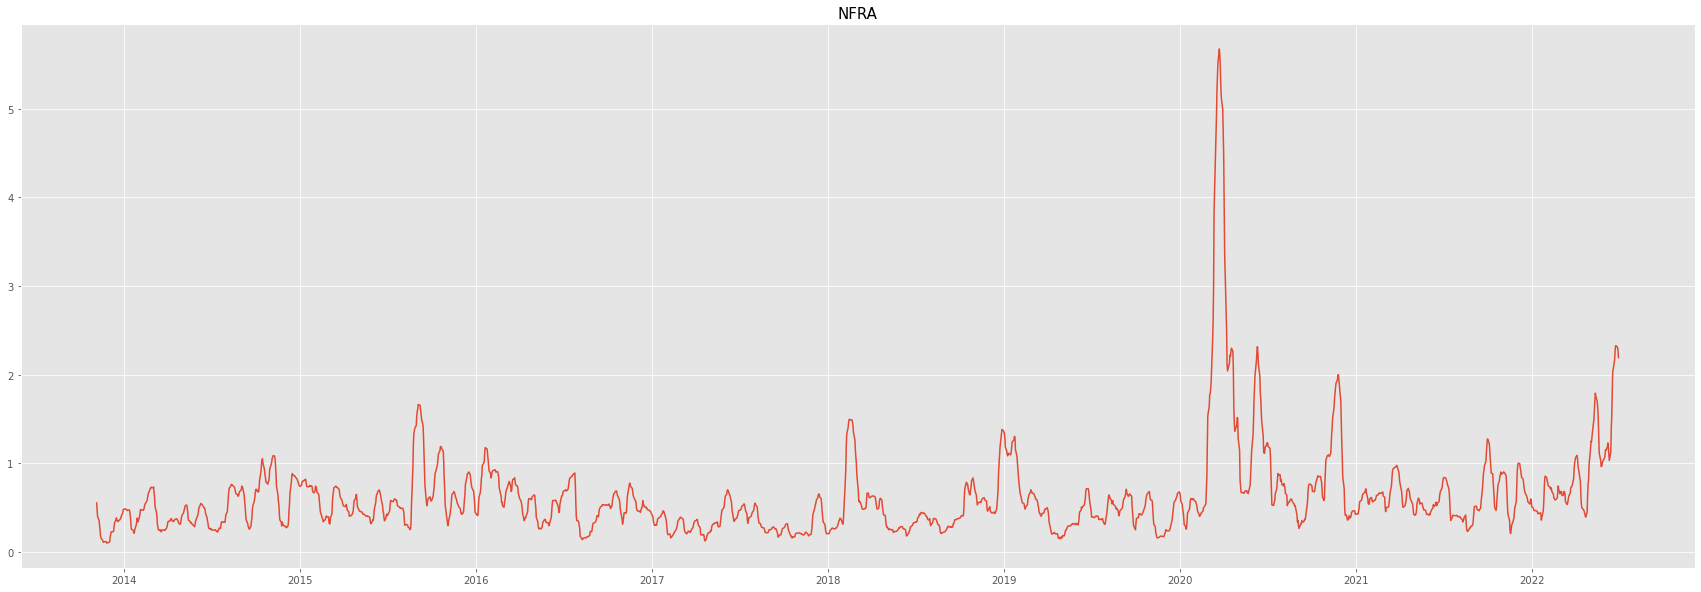

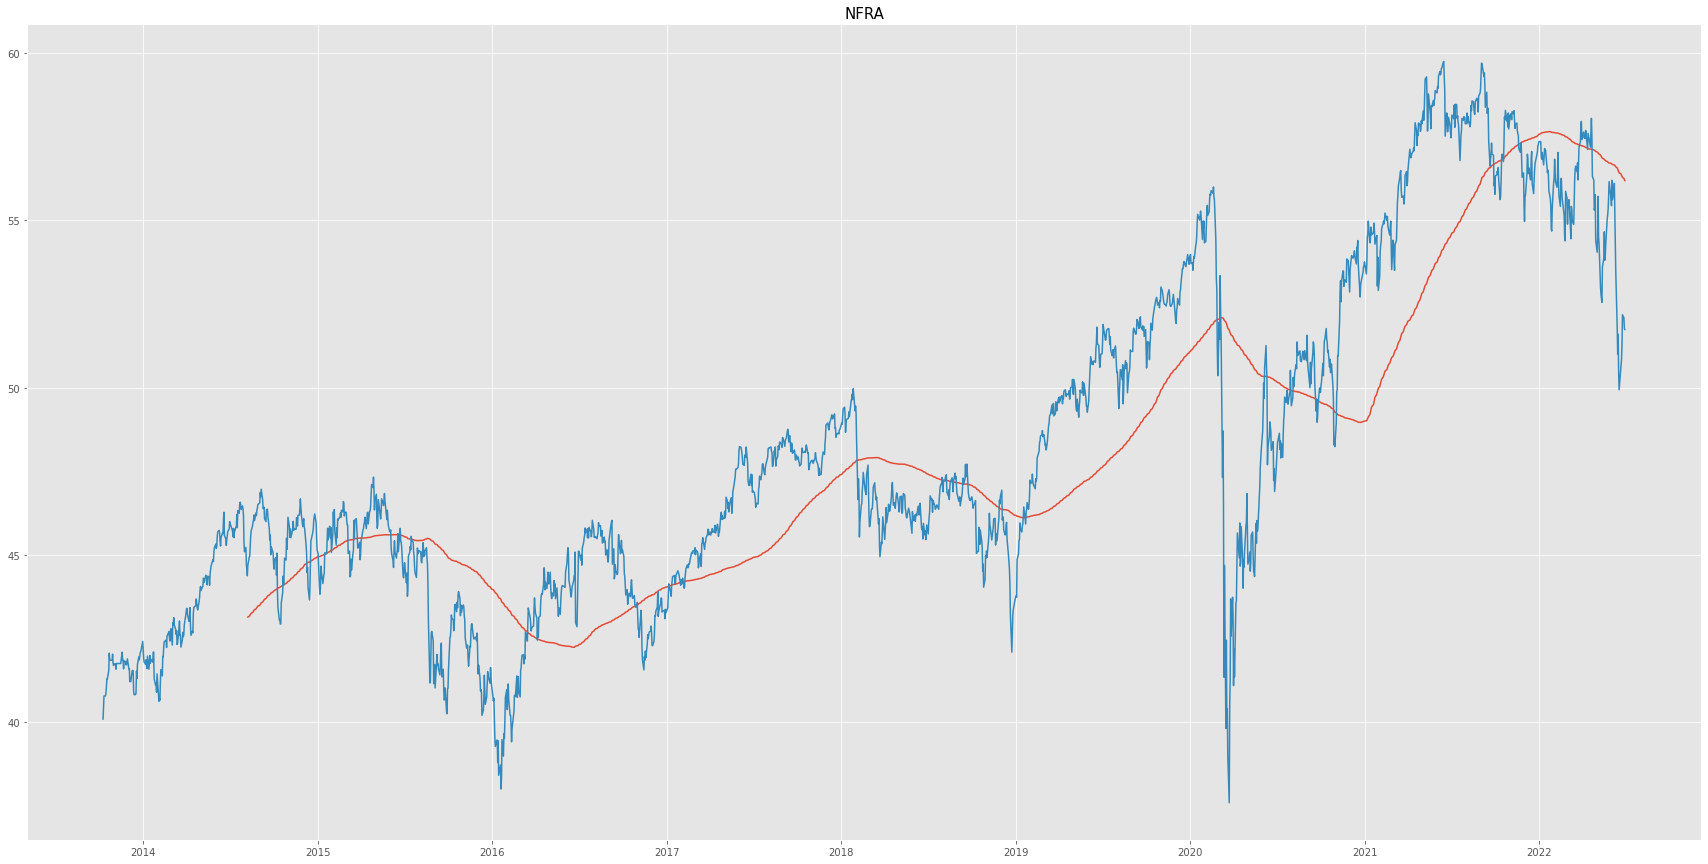

In [77]:
ticker_s = 'NFRA'
df = yF.download(ticker_s, start=start, end=end)
get_stats_chart(df)

[*********************100%***********************]  1 of 1 completed
Below 210-SMA
Current Distance from 210-SMA: Date
2022-06-29   -3.27
Current Closing Price: Date
2022-06-29    40.47
Current 210-SMA: Date
2022-06-29    41.82
Current Standard Deviation: Date
2022-06-29    3.18
Average Standard Deviation: 0.66


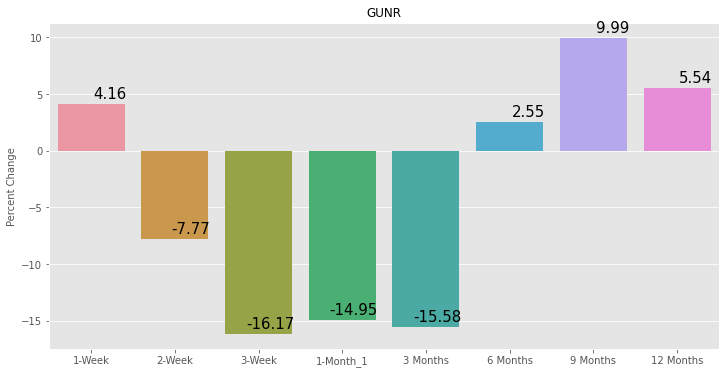

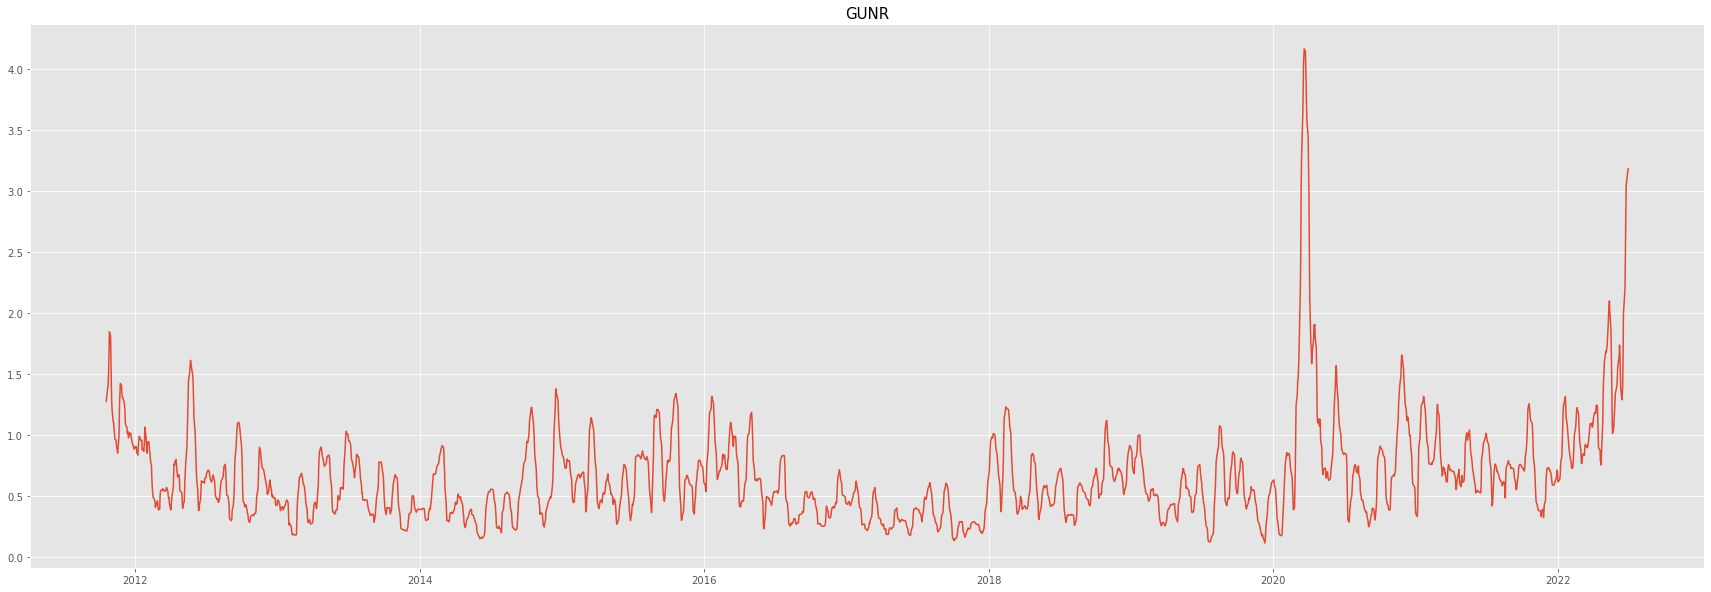

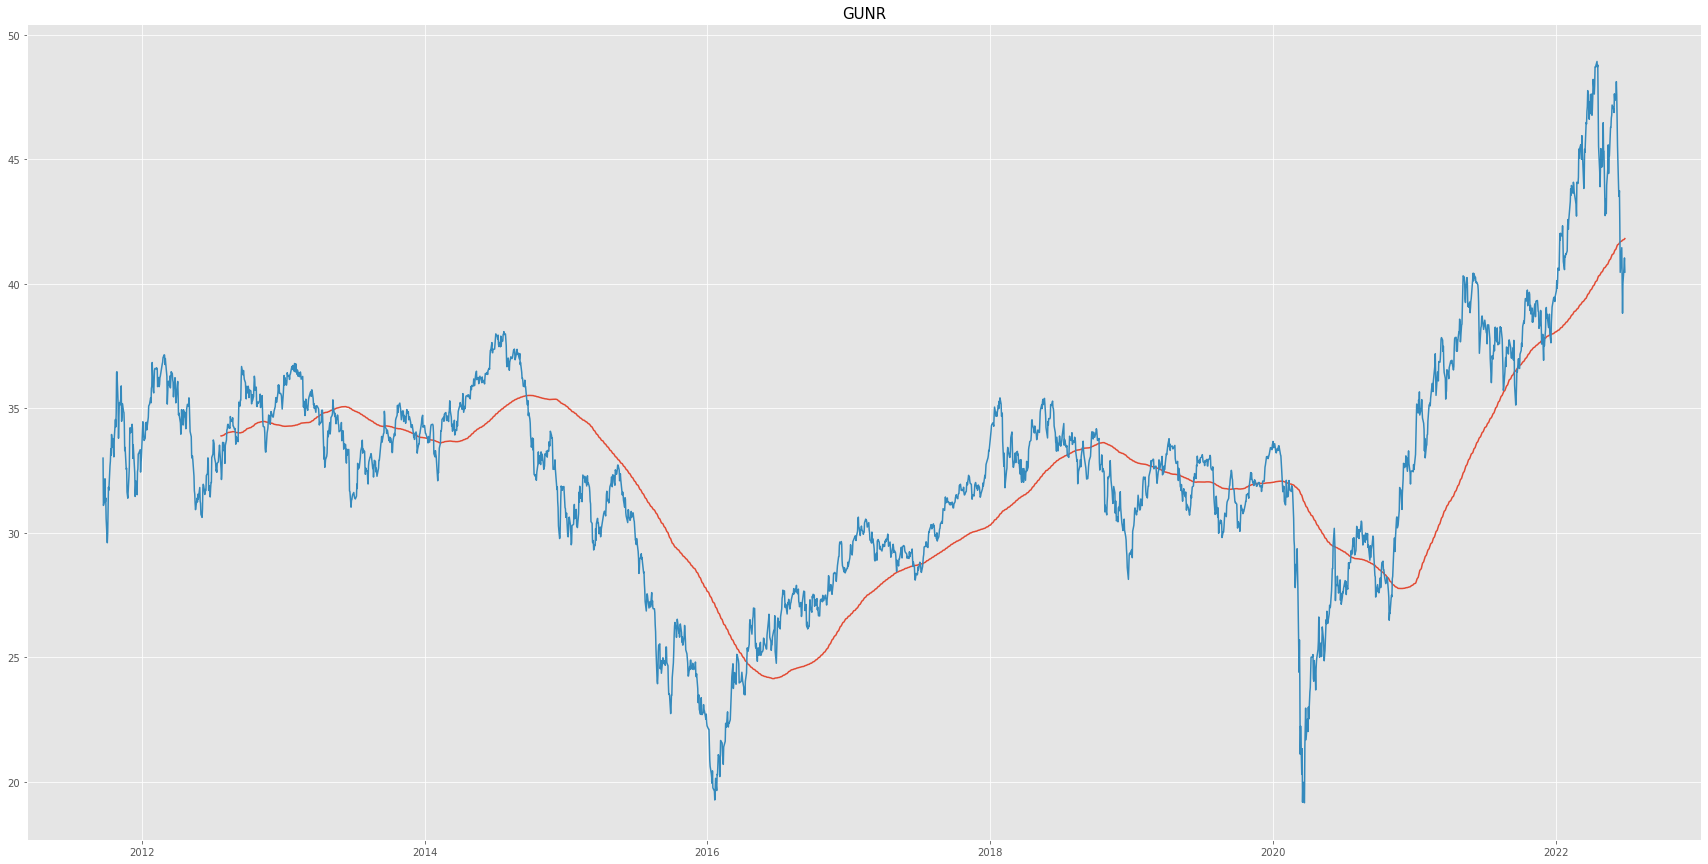

In [78]:
ticker_s = 'GUNR'
df = yF.download(ticker_s, start=start, end=end)
get_stats_chart(df)

[*********************100%***********************]  1 of 1 completed
Above 210-SMA
Current Distance from 210-SMA: Date
2022-06-29    16.59
Current Closing Price: Date
2022-06-29    23.79
Current 210-SMA: Date
2022-06-29    20.14
Current Standard Deviation: Date
2022-06-29    0.93
Average Standard Deviation: 0.48


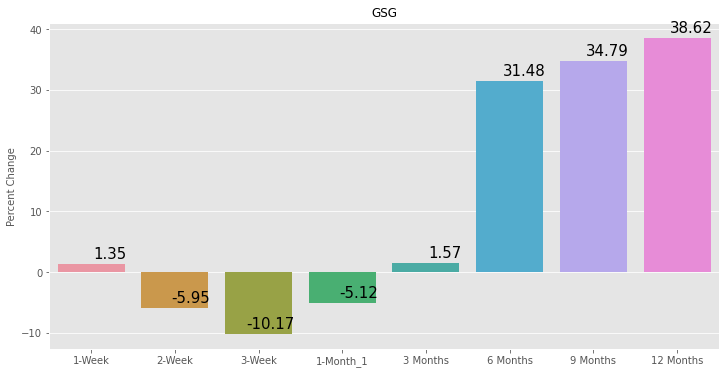

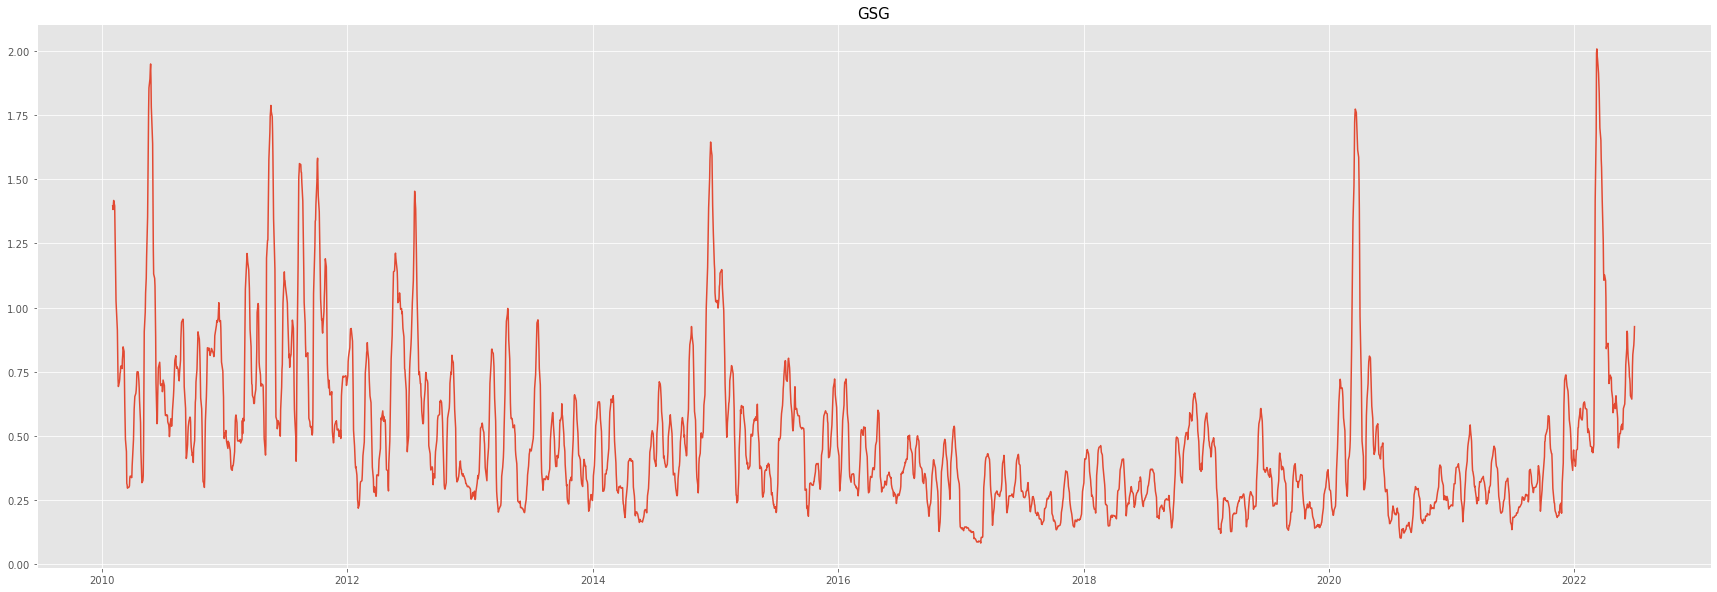

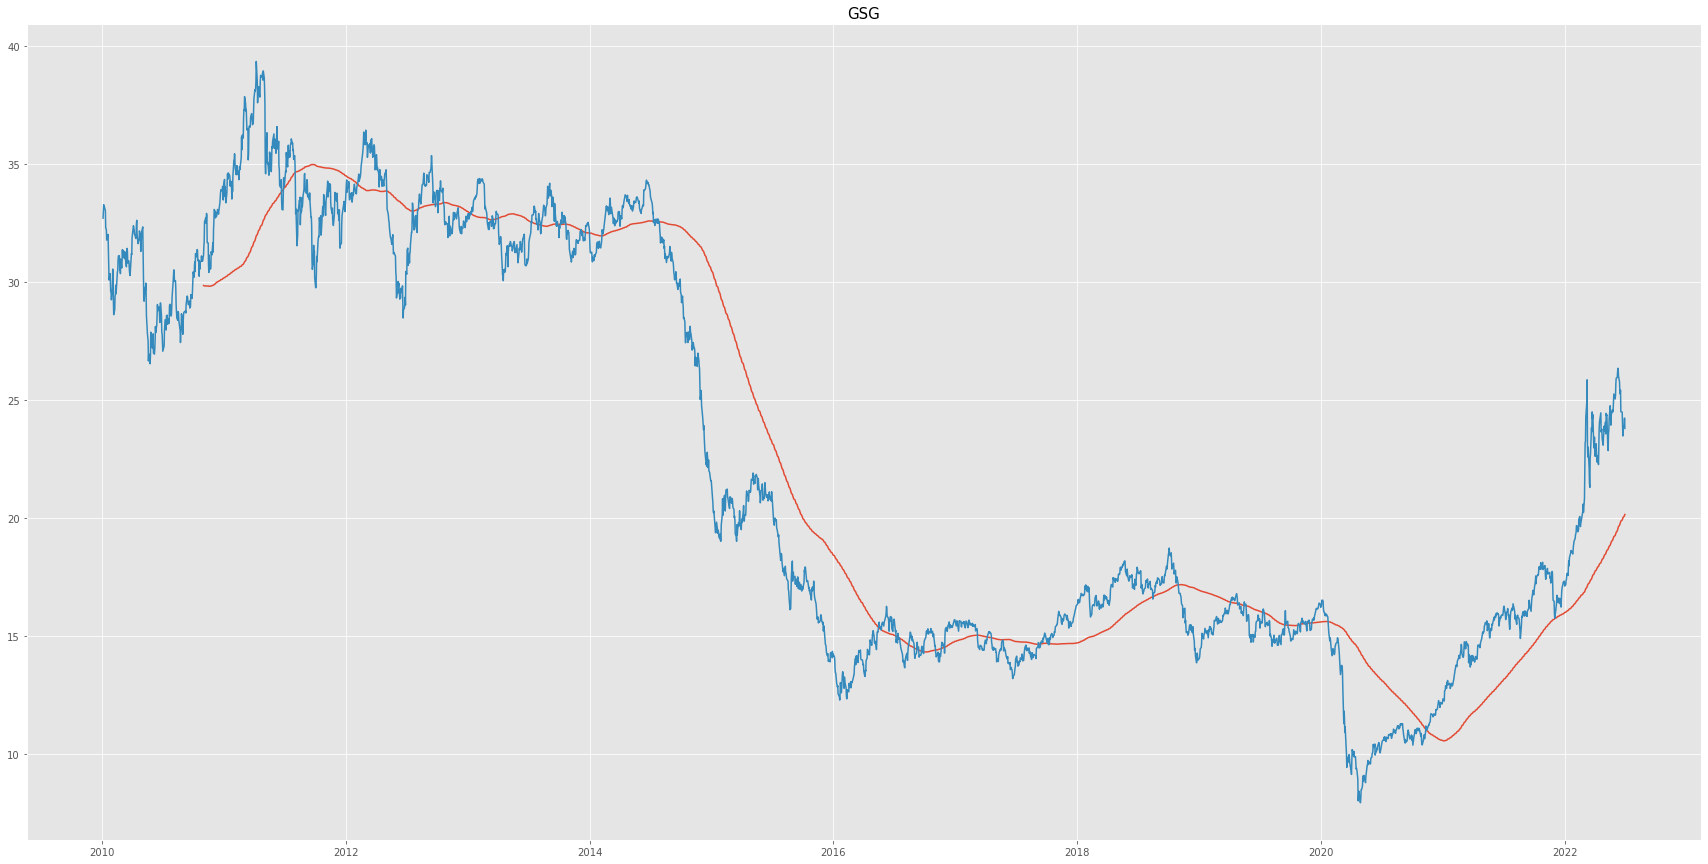

In [79]:
ticker_s = 'GSG'
df = yF.download(ticker_s, start=start, end=end)
get_stats_chart(df)

[*********************100%***********************]  1 of 1 completed
Below 210-SMA
Current Distance from 210-SMA: Date
2022-06-29   -1.32
Current Closing Price: Date
2022-06-29    34.55
Current 210-SMA: Date
2022-06-29    35.01
Current Standard Deviation: Date
2022-06-29    0.32
Average Standard Deviation: 0.5


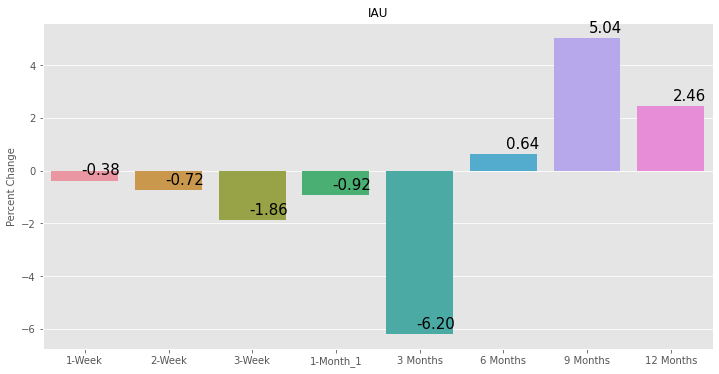

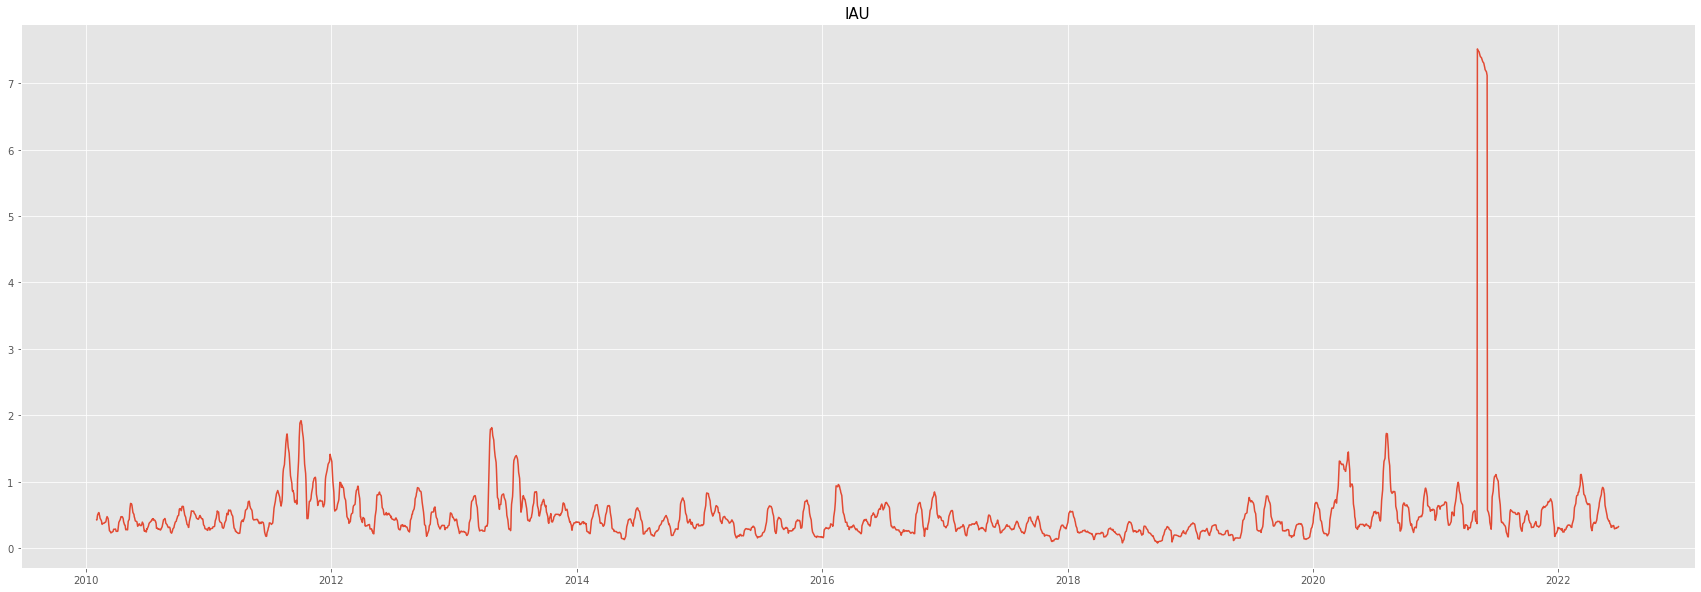

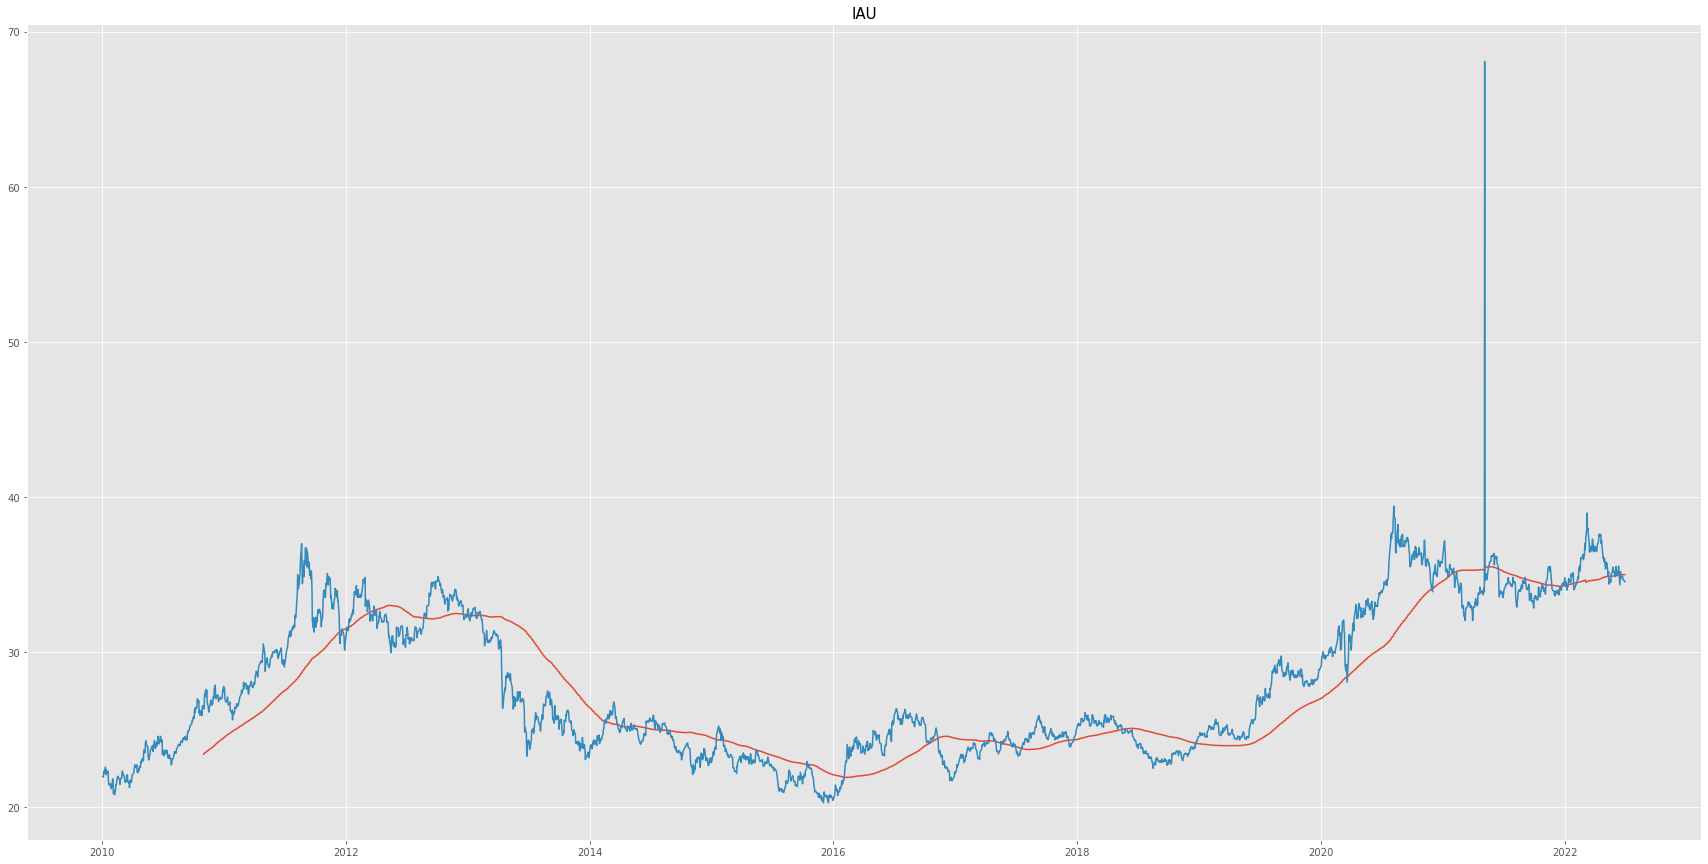

In [80]:
ticker_s = 'IAU'
df = yF.download(ticker_s, start=start, end=end)
get_stats_chart(df)

[*********************100%***********************]  1 of 1 completed
Above 210-SMA
Current Distance from 210-SMA: Date
2022-06-29    7.08
Current Closing Price: Date
2022-06-29    28.05
Current 210-SMA: Date
2022-06-29    26.13
Current Standard Deviation: Date
2022-06-29    0.3
Average Standard Deviation: 0.19


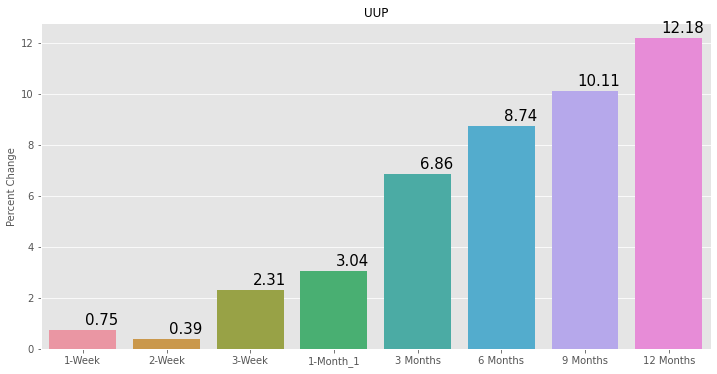

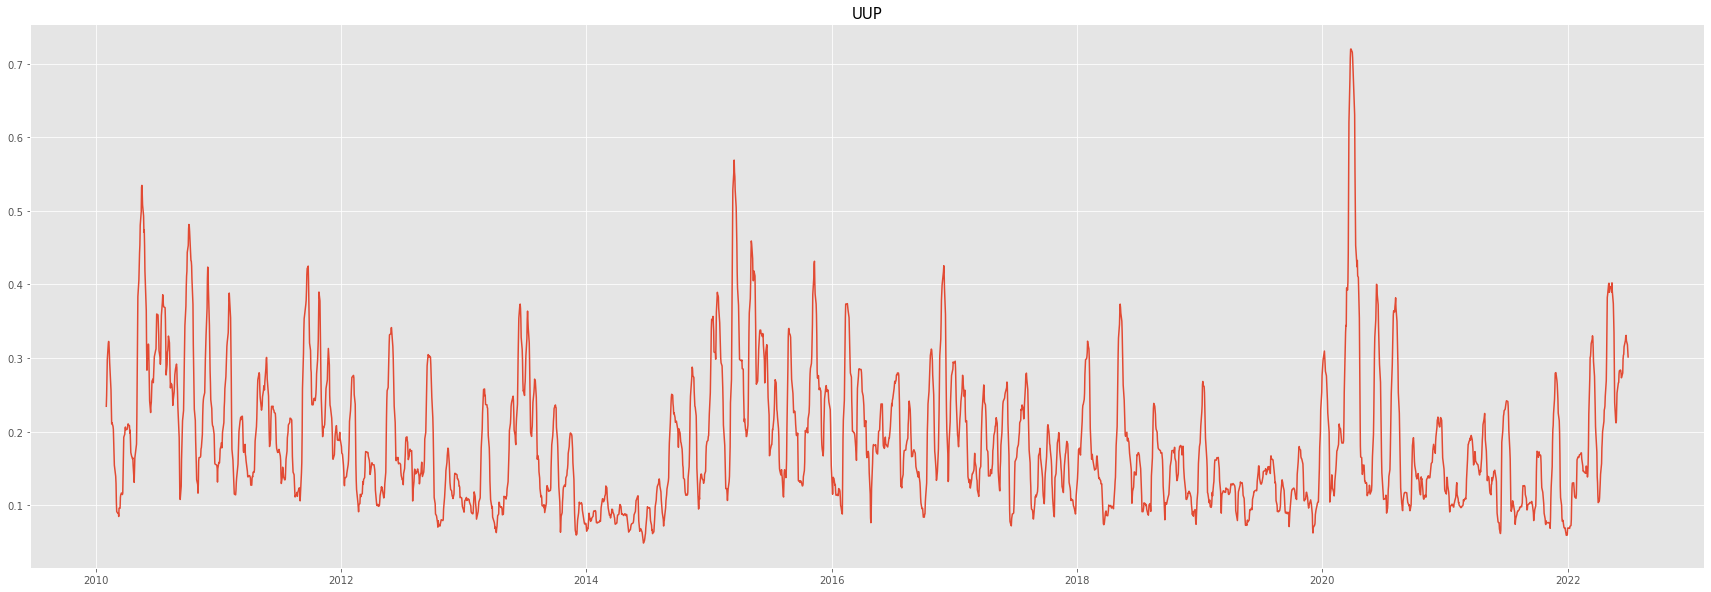

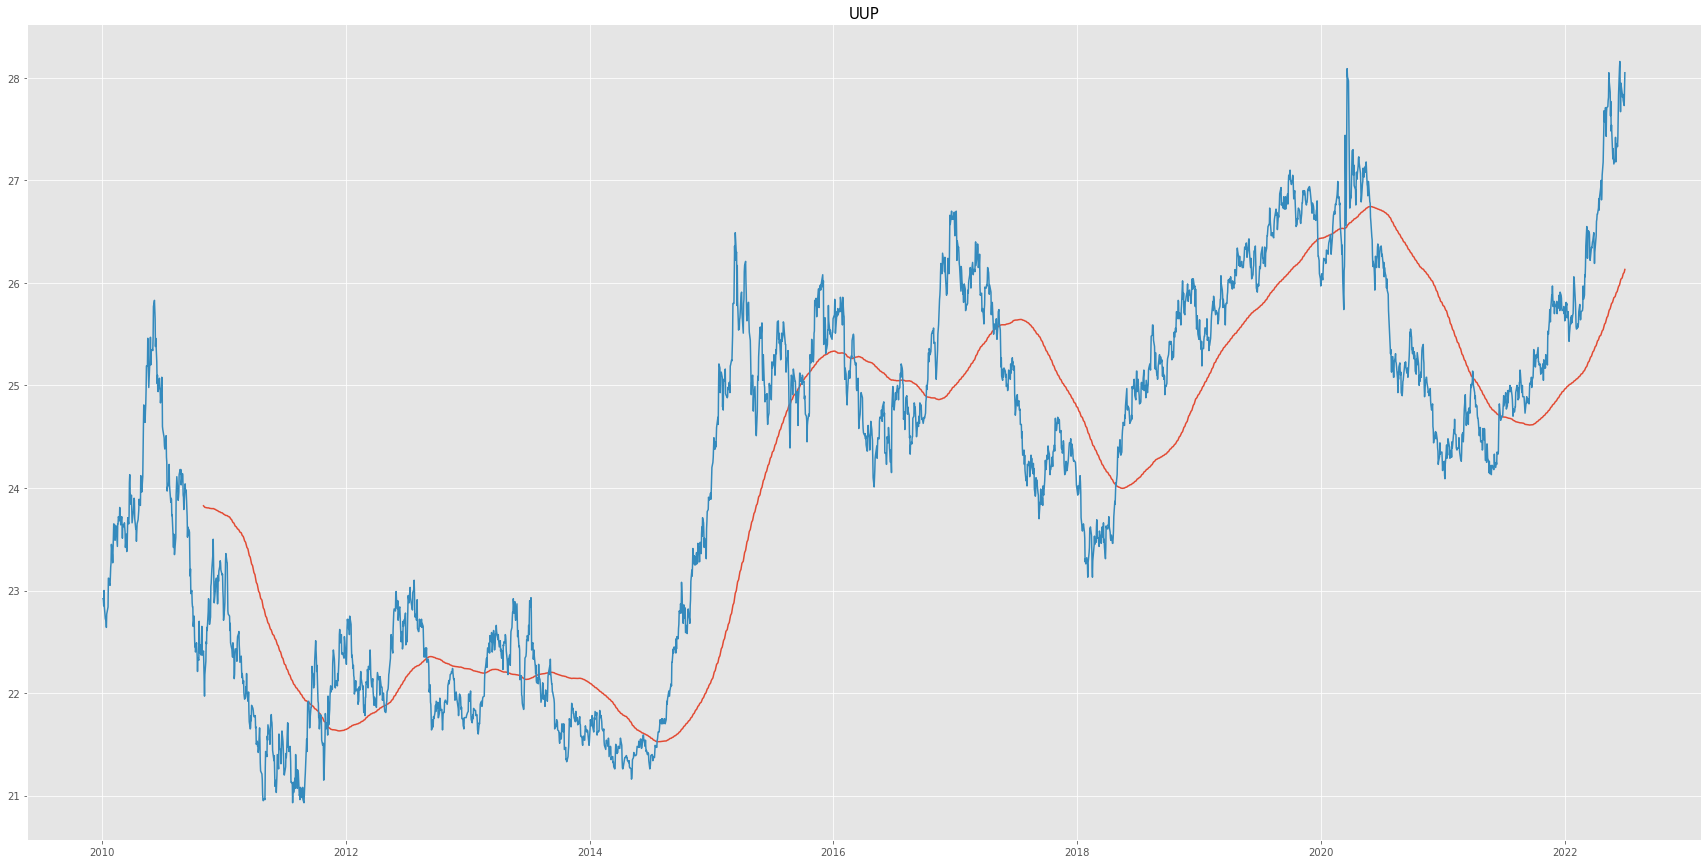

In [81]:
ticker_s = 'UUP'
df = yF.download(ticker_s, start=start, end=end)
get_stats_chart(df)

[*********************100%***********************]  1 of 1 completed
Below 210-SMA
Current Distance from 210-SMA: Date
2022-06-29   -7.95
Current Closing Price: Date
2022-06-29    18.35
Current 210-SMA: Date
2022-06-29    19.87
Current Standard Deviation: Date
2022-06-29    0.22
Average Standard Deviation: 0.18


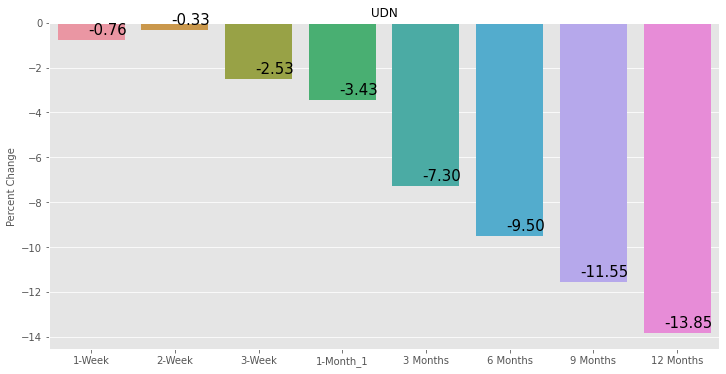

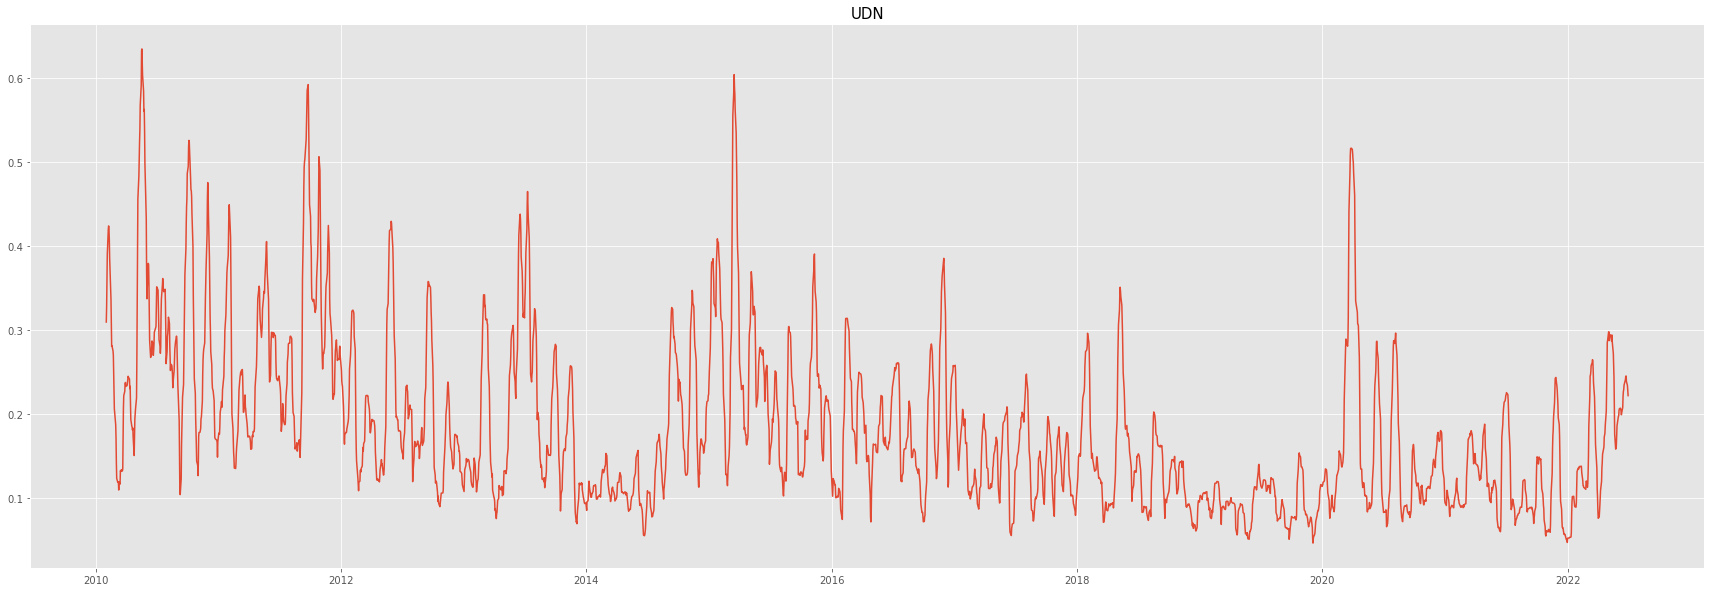

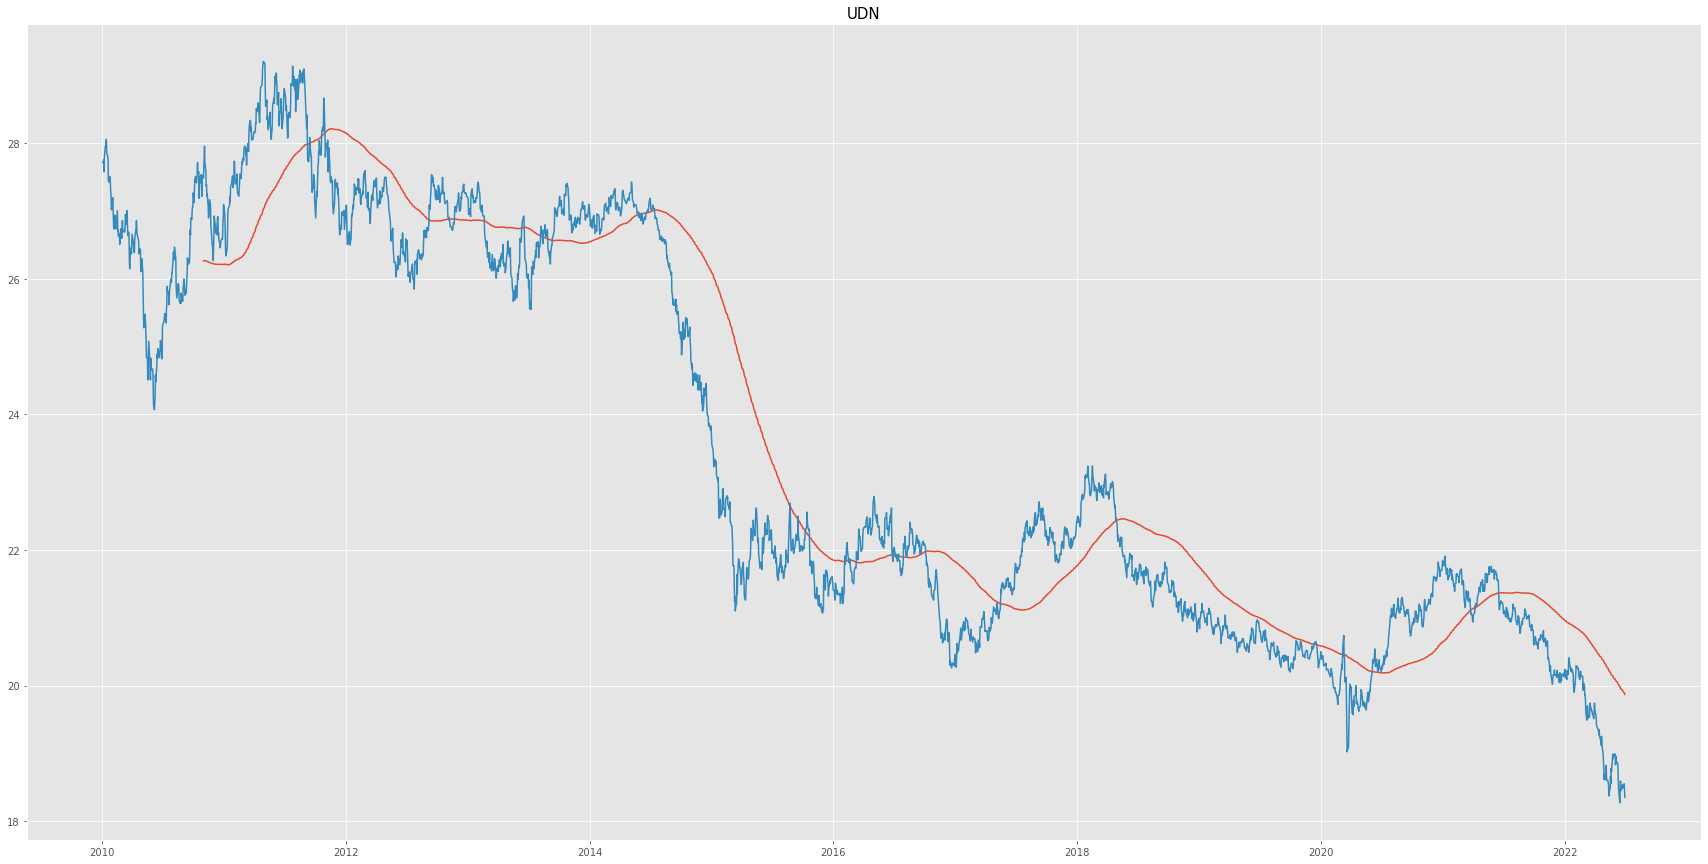

In [82]:
ticker_s = 'UDN'
df = yF.download(ticker_s, start=start, end=end)
get_stats_chart(df)

[*********************100%***********************]  1 of 1 completed
Below 210-SMA
Current Distance from 210-SMA: Date
2022-06-29   NaN
Current Closing Price: Date
2022-06-29    12.48
Current 210-SMA: Date
2022-06-29   NaN
Current Standard Deviation: Date
2022-06-29    2.99
Average Standard Deviation: 2.02


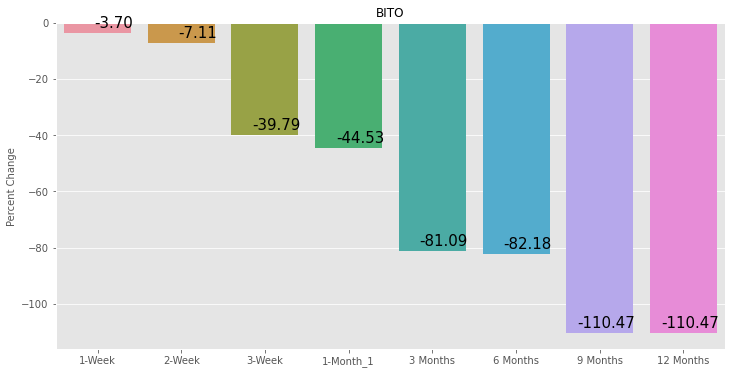

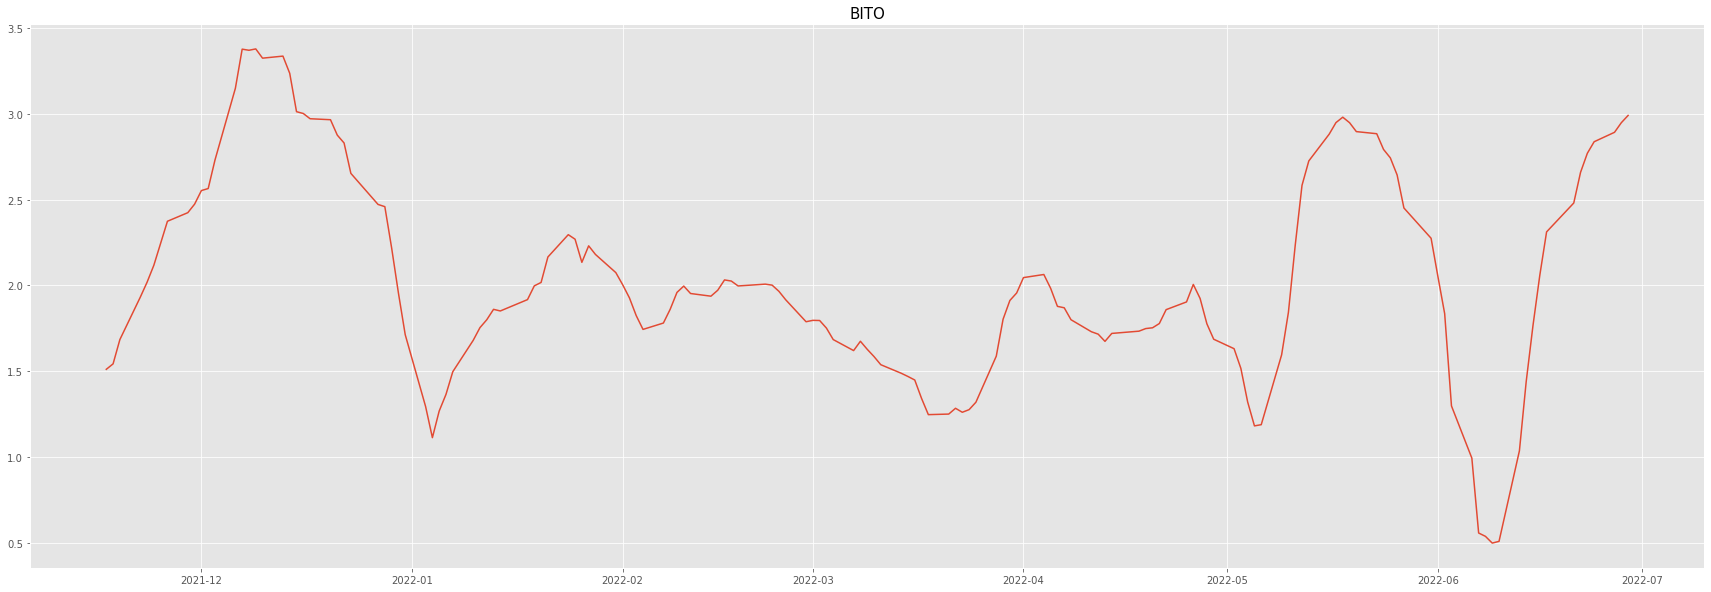

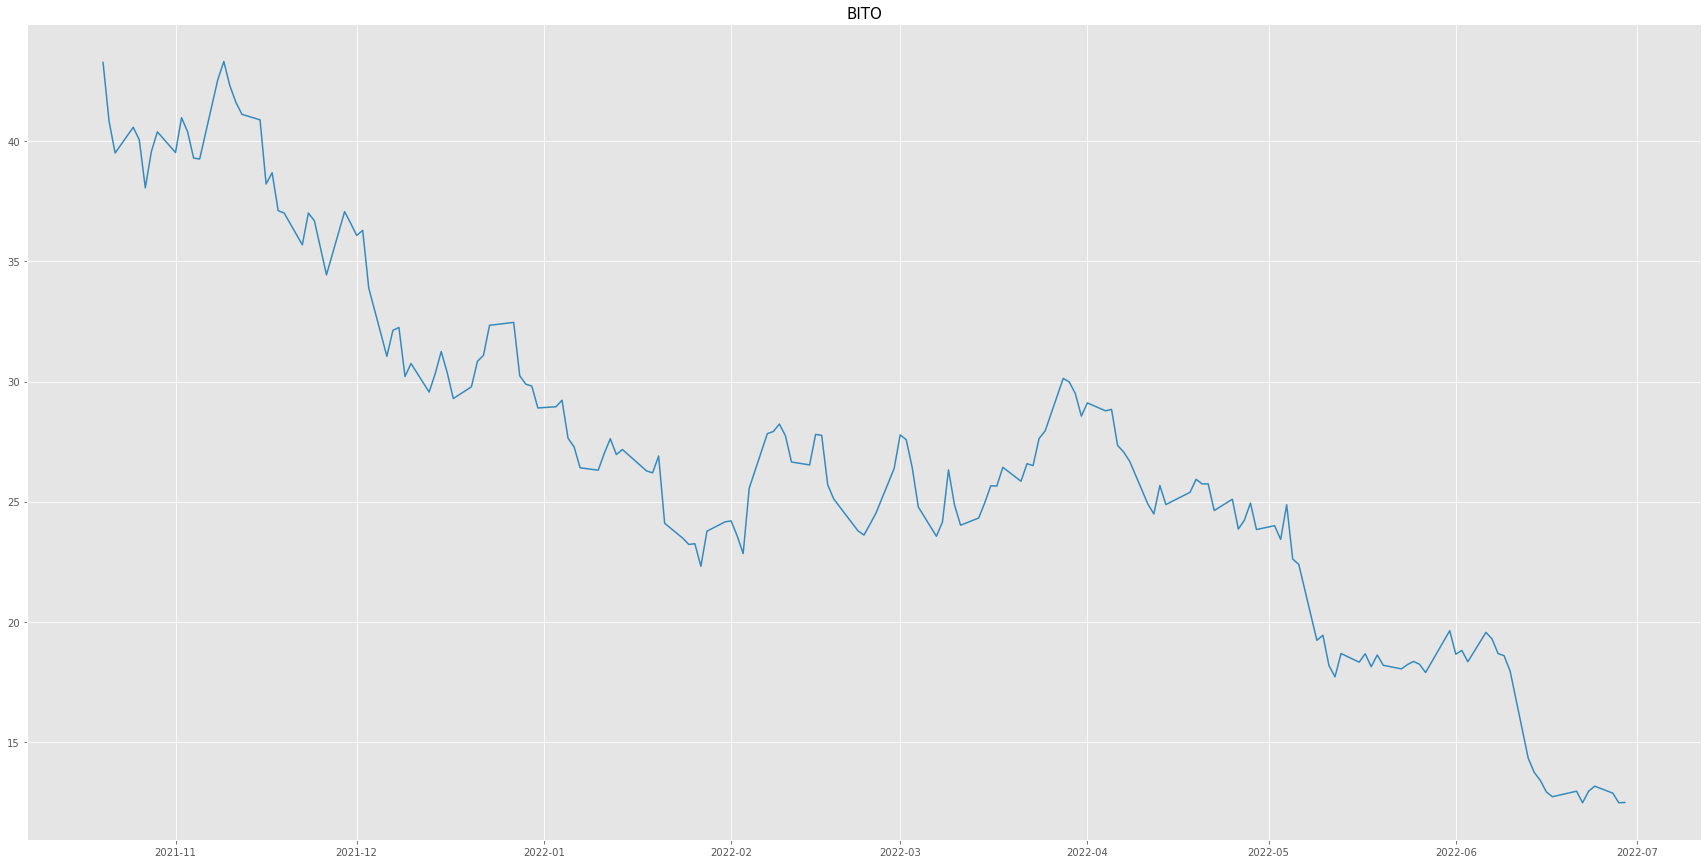

In [83]:
ticker_s = 'BITO'
df = yF.download(ticker_s, start=start, end=end)
get_stats_chart(df)

[*********************100%***********************]  1 of 1 completed
Below 210-SMA
Current Distance from 210-SMA: Date
2022-06-29   NaN
Current Closing Price: Date
2022-06-29    41.0
Current 210-SMA: Date
2022-06-29   NaN
Current Standard Deviation: Date
2022-06-29   NaN
Average Standard Deviation: nan


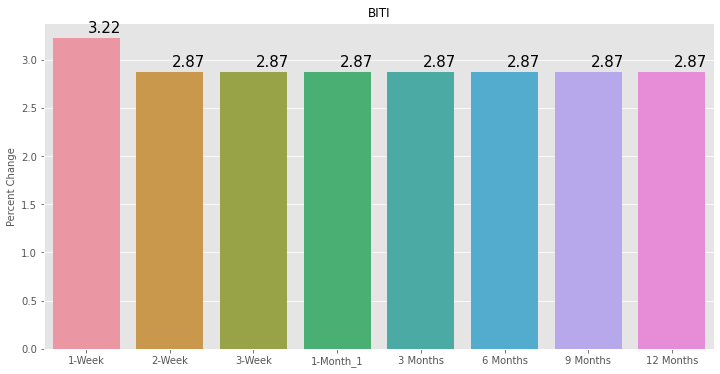

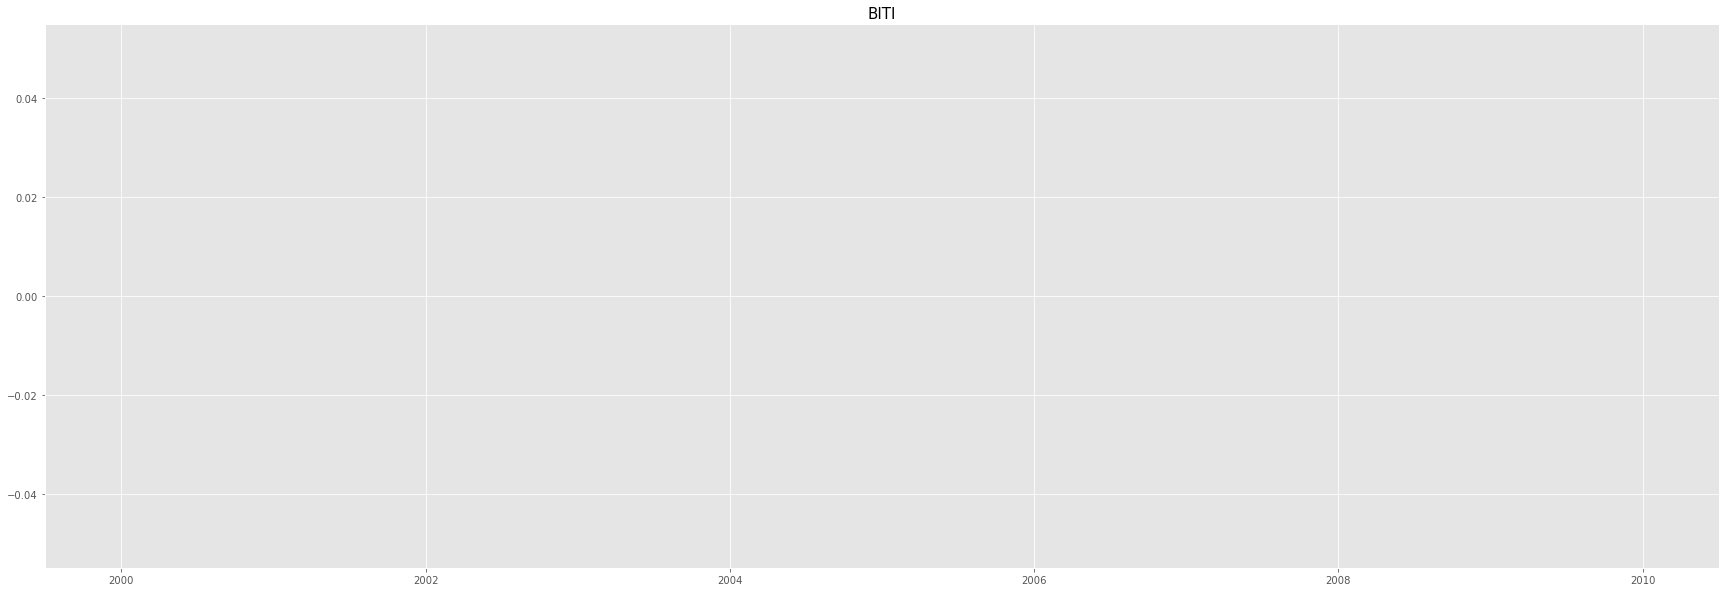

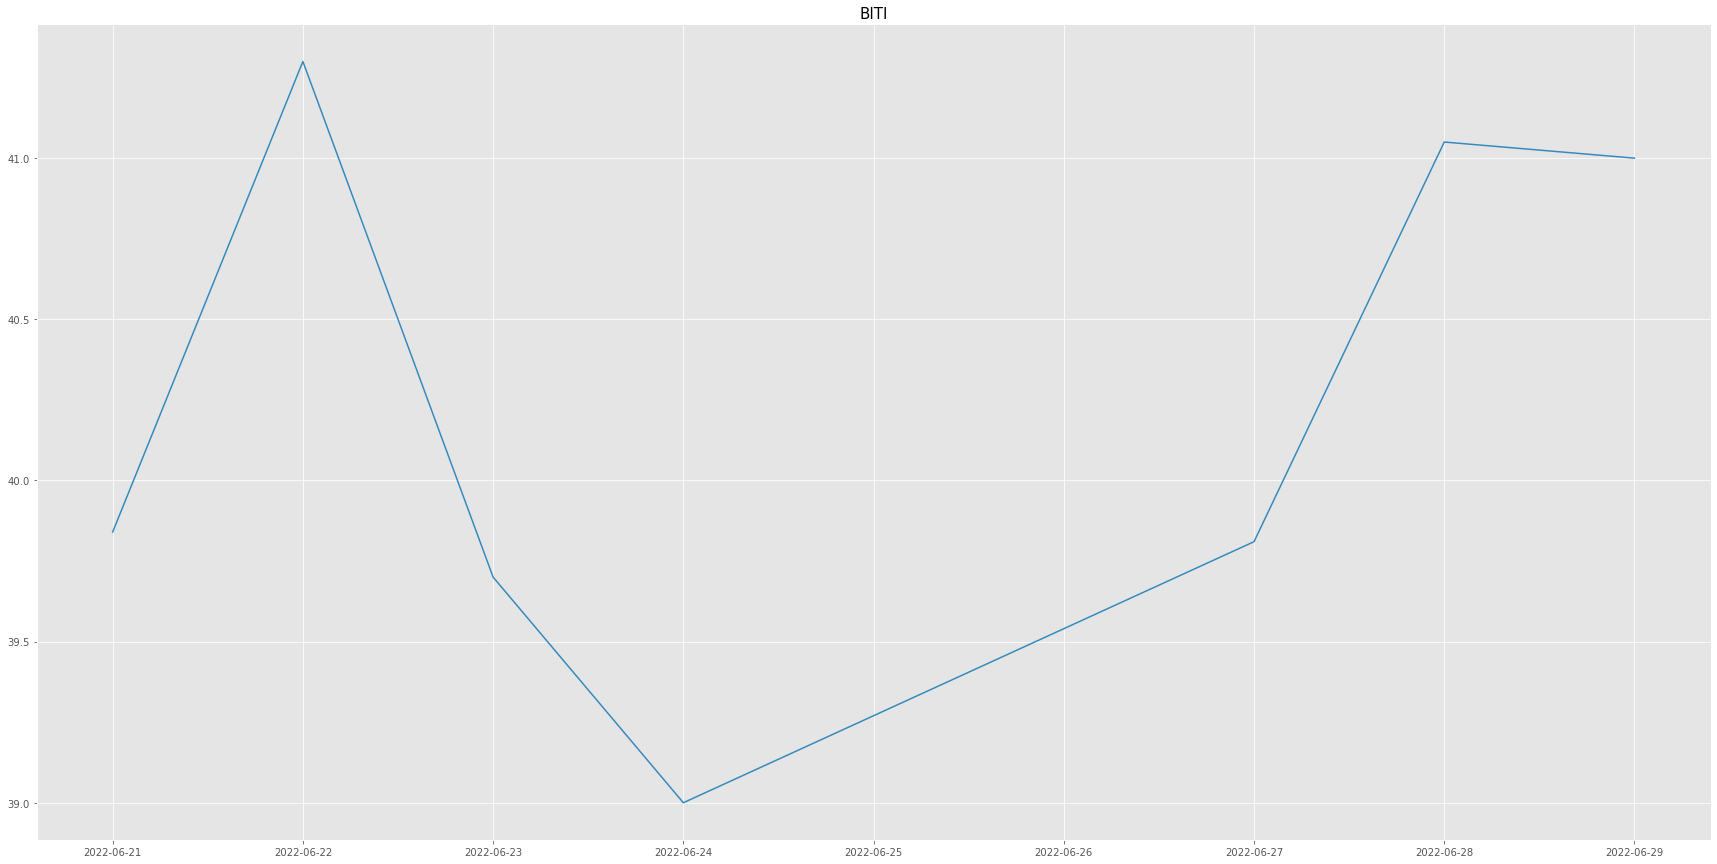

In [84]:
ticker_s = 'BITI'
df = yF.download(ticker_s, start=start, end=end)
get_stats_chart(df)